In [1]:
import numpy as np
import pandas as pd
import mglearn
import sklearn
import IPython.display as display
import matplotlib.pyplot as plt

C:\Users\E\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\E\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


C:\Users\E\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


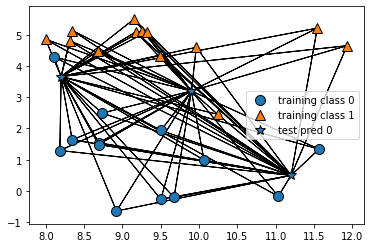

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors = 26)
    #forge 데이터의 knn분류기의 예

In [3]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
print(X.shape, y.shape)
    #X.shape == [26, 2], y.shape[26,]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    #X_train == 19, X_test == 7

(26, 2) (26,)


C:\Users\E\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
    #kNN Classifier Model(n = 3) 생성
clf.fit(X_train, y_train)
    #3NN Classifier Model에 훈련데이터 fitting
clf.predict(X_test)    
    #[1, 0, 1, 0, 1, 0, 0], 7개 예측 레이블(클래스) 데이터
print("Test Set Accuracy: {:.2f}".format(clf.score(X_test, y_test)))    
    #7개 실험데이터의 실제 클래스와 비교

Test Set Accuracy: 0.86


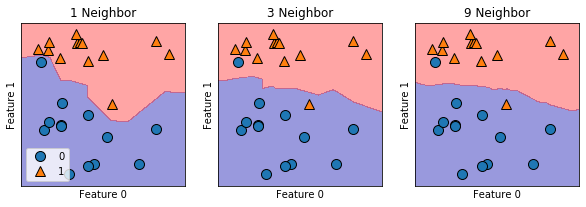

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc = 3)

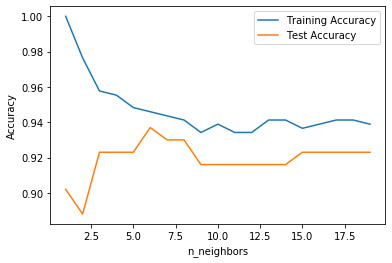

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

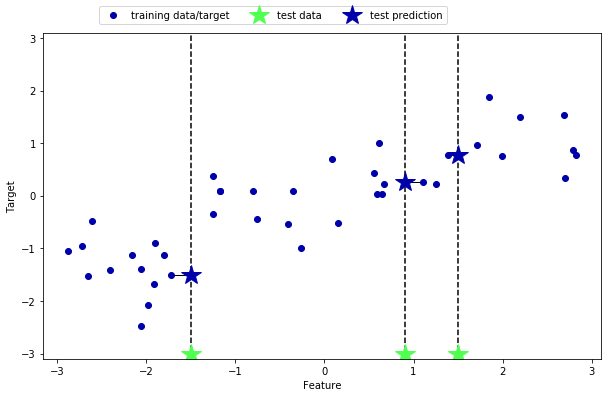

In [7]:
#kNN Regressor
mglearn.plots.plot_knn_regression(n_neighbors = 1)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    #X_train.shape == (30, 1), X_test.shape == (10, 1)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [9]:
#reg.score()로 만든 R^2값과 hade-made R^2값 비교 (동일)
print("Test Set R^2:", reg.score(X_test, y_test))
aver_y_test = np.mean(y_test)
head, tail = 0, 0
for idx in range(len(y_test)):
    head += (y_test[idx] - reg.predict(X_test)[idx]) ** 2
    tail += (y_test[idx] - aver_y_test) ** 2
print("hand-made R^2:", 1 - (head / tail))
    

Test Set R^2: 0.8344172446249604
hand-made R^2: 0.8344172446249605


[[-3.        ]
 [-2.99399399]
 [-2.98798799]
 [-2.98198198]
 [-2.97597598]
 [-2.96996997]
 [-2.96396396]
 [-2.95795796]
 [-2.95195195]
 [-2.94594595]
 [-2.93993994]
 [-2.93393393]
 [-2.92792793]
 [-2.92192192]
 [-2.91591592]
 [-2.90990991]
 [-2.9039039 ]
 [-2.8978979 ]
 [-2.89189189]
 [-2.88588589]
 [-2.87987988]
 [-2.87387387]
 [-2.86786787]
 [-2.86186186]
 [-2.85585586]
 [-2.84984985]
 [-2.84384384]
 [-2.83783784]
 [-2.83183183]
 [-2.82582583]
 [-2.81981982]
 [-2.81381381]
 [-2.80780781]
 [-2.8018018 ]
 [-2.7957958 ]
 [-2.78978979]
 [-2.78378378]
 [-2.77777778]
 [-2.77177177]
 [-2.76576577]
 [-2.75975976]
 [-2.75375375]
 [-2.74774775]
 [-2.74174174]
 [-2.73573574]
 [-2.72972973]
 [-2.72372372]
 [-2.71771772]
 [-2.71171171]
 [-2.70570571]
 [-2.6996997 ]
 [-2.69369369]
 [-2.68768769]
 [-2.68168168]
 [-2.67567568]
 [-2.66966967]
 [-2.66366366]
 [-2.65765766]
 [-2.65165165]
 [-2.64564565]
 [-2.63963964]
 [-2.63363363]
 [-2.62762763]
 [-2.62162162]
 [-2.61561562]
 [-2.60960961]
 [-2.60360

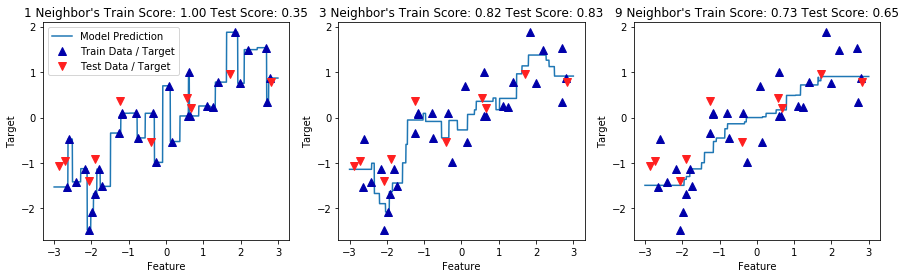

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print(line, '\n', type(line), '\n', line.shape)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(\
    "{} Neighbor's Train Score: {:.2f} Test Score: {:.2f}".format(\
    n_neighbors, reg.score(X_train, y_train),\
                                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Prediction", "Train Data / Target", "Test Data / Target"], loc="best")